# STRESS Detection  using Naive bayes Bernoulli Algoritm

In [1]:
#importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


# Pre processing

In [2]:
df =pd.read_csv('C:/Users/abhis/OneDrive/Documents/stress.csv')

In [3]:
df.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [4]:
df.describe()

,id,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
count,2838.000000,2838.000000,2838.000000,2.838000e+03,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,...,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000
mean,13751.999295,0.524313,0.808972,1.518107e+09,18.262156,4.684272,85.996124,35.240941,40.948231,67.044249,...,1.088001,1.120099,1.000211,1.722759,1.536400,1.879385,0.843517,9.948555,5.448836,0.040740
std,17340.161897,0.499497,0.177038,1.552209e+07,79.419166,3.316435,32.334887,26.486189,31.587117,32.880644,...,0.117159,0.085227,0.006500,0.047835,0.102971,0.058932,0.174794,21.798032,2.535829,0.195490
min,4.000000,0.000000,0.428571,1.483274e+09,0.000000,-6.620000,5.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.485400,1.200000,1.561150,0.140000,0.000000,-1.918000,-1.000000
25%,926.250000,0.000000,0.600000,1.509698e+09,2.000000,2.464243,65.000000,12.410000,12.135000,41.070000,...,1.000000,1.000000,1.000000,1.691430,1.469745,1.841782,0.750000,2.000000,3.729973,-0.072222
50%,1891.500000,1.000000,0.800000,1.517066e+09,5.000000,4.321886,81.000000,29.420000,33.520000,80.710000,...,1.000000,1.142900,1.000000,1.721430,1.530295,1.878250,0.890000,5.000000,5.210000,0.044821
75%,25473.750000,1.000000,1.000000,1.530898e+09,10.000000,6.505657,101.000000,55.057500,69.320000,96.180000,...,1.142900,1.142900,1.000000,1.751760,1.596030,1.916243,1.000000,10.000000,6.855217,0.166667
max,55757.000000,1.000000,1.000000,1.542592e+09,1435.000000,24.074231,310.000000,99.000000,99.000000,99.000000,...,1.900000,1.500000,1.200000,2.007400,2.066670,2.158490,1.000000,416.000000,21.198919,1.000000


In [5]:
df.isnull().sum()

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64

In [6]:
df.dtypes

subreddit                    object
post_id                      object
sentence_range               object
text                         object
id                            int64
                             ...   
lex_dal_avg_pleasantness    float64
social_upvote_ratio         float64
social_num_comments           int64
syntax_fk_grade             float64
sentiment                   float64
Length: 116, dtype: object

In [7]:
df.shape

(2838, 116)

In [8]:
np.unique(df['label'])

array([0, 1], dtype=int64)

In [9]:
new_df = df['label'].value_counts().rename_axis('type').reset_index(name = 'Count')
new_df

,type,Count
0,1,1488
1,0,1350


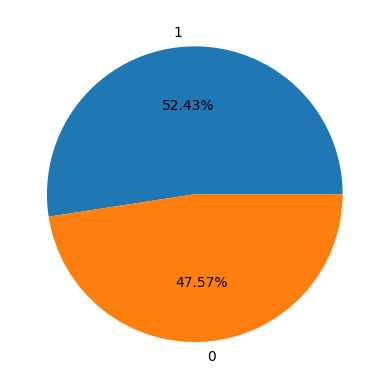

In [10]:
chart_labels = new_df.type
chart_values = new_df.Count
plt.pie(chart_values,labels = chart_labels, autopct = '%1.2f%%')
plt.show()

# cleaning the Text

In [11]:

import nltk
import re
from nltk. corpus import stopwords
import string
nltk. download( 'stopwords' )
stemmer = nltk. SnowballStemmer("english")
stopword=set (stopwords . words ( 'english' ))

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [12]:
def clean(text):
    text = str(text) . lower()  #returns a string where all characters are lower case. Symbols and Numbers are ignored.
    text = re. sub('\[.*?\]',' ',text)  #substring and returns a string with replaced values.
    text = re. sub('https?://\S+/www\. \S+', ' ', text)#whitespace char with pattern
    text = re. sub('<. *?>+', ' ', text)#special char enclosed in square brackets
    text = re. sub(' [%s]' % re. escape(string. punctuation), ' ', text)#eliminate punctuation from string
    text = re. sub(' \n',' ', text)
    text = re. sub(' \w*\d\w*' ,' ', text)#word character ASCII punctuation
    text = [word for word in text. split(' ') if word not in stopword]  #removing stopwords
    text =" ". join(text)
    text = [stemmer . stem(word) for word in text. split(' ') ]#remove morphological affixes from words
    text = " ". join(text)
    return text
df [ "text"] = df["text"]. apply(clean)

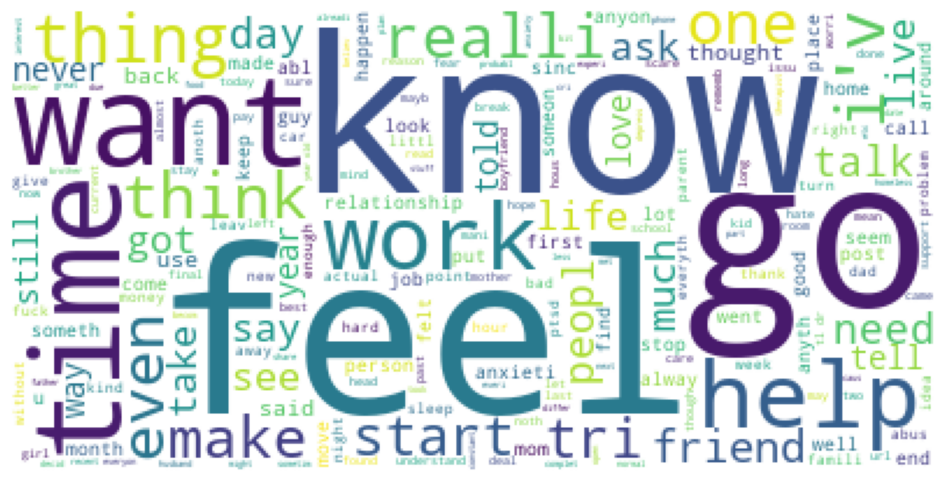

In [13]:
import matplotlib. pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ". join(i for i in df. text)
stopwords = set (STOPWORDS)
wordcloud = WordCloud( stopwords=stopwords,background_color="white") . generate(text)
plt. figure(figsize=(12, 10) )
plt. imshow(wordcloud )
plt. axis("off")
plt. show( )


# converting the TEXT message( target attributes) to sparse matrix

In [14]:

from sklearn. feature_extraction. text import CountVectorizer
from sklearn. model_selection import train_test_split

x = np.array (df["text"])
y = np.array (df["label"])

cv = CountVectorizer ()
X = cv. fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state=42)


# Naive bayes Bernoulli Classifier

In [15]:
from sklearn.naive_bayes import BernoulliNB
model=BernoulliNB( binarize=0.0)
model.fit(xtrain,ytrain)
training_score=model.score(xtrain,ytrain)*100
test_score=model.score(xtest,ytest)*100
print('Training Score is : ',training_score)
print('Test Score is : ',test_score)
pred1 = model.predict(xtest)


Training Score is :  92.90748898678413
Test Score is :  75.35211267605634


# Confusion matrix and classification report for Model

In [16]:
def confusion(m,ytest,ypred):
    m = confusion_matrix(ytest,ypred)
    print(m)
    sns.heatmap(m, annot = True, fmt = ".0f")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.title("Confusion matrix for Naive bayes Bernoulli Classifier")
    plt.show()
    report= classification_report(ytest, ypred)
    print(report)

[[169  94]
 [ 46 259]]


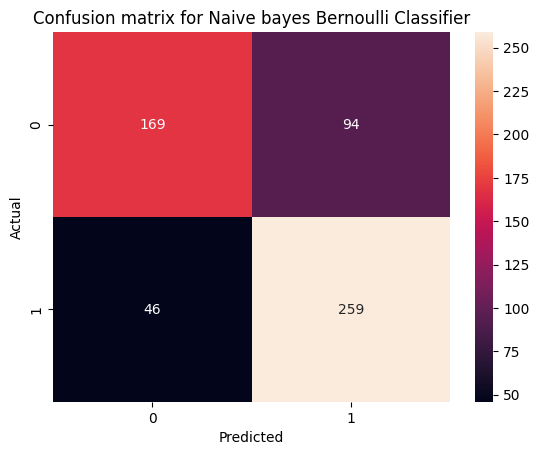

              precision    recall  f1-score   support

           0       0.79      0.64      0.71       263
           1       0.73      0.85      0.79       305

    accuracy                           0.75       568
   macro avg       0.76      0.75      0.75       568
weighted avg       0.76      0.75      0.75       568



In [17]:
confusion(model,ytest,pred1)

In [18]:
user=input("Enter the text:  ")
data=cv.transform([user]).toarray()
output=model.predict(data)
if output==1:
    print('STRESS is detected')
else:
    print('NO Stress')
    
print(output)

Enter the text:  sometimes, i feel like i need some help.
STRESS is detected
[1]


# CONCLUSION

# To detect the stress we have used the Naive bayes Bernoulli Algoritm and Based on the results of our machine learning model, we have determined that the model has an accuracy of 75.35%.While this performance is promising, it is important to note that there may be room for further improvement. Additional data or feature engineering may be necessary to increase the model's accuracy.